# IBM Applied Data Science Capstone Course by Coursera
### Week 5 Final Assignment
**_Opening a New Shopping Mall in Bangalore, India_**
- Build a dataframe of neighborhoods in Bangalore, India by web scraping the data from Wikipedia page
- Get the geographical coordinates of the neighborhoods
- Obtain the venue data for the neighborhoods from Foursquare API
- Explore and cluster the neighborhoods
- Select the best cluster to open a new shopping mall
***
### 1. Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


### 2. Scrap data from Wikipedia page into a DataFrame

In [2]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Bangalore").text

In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [4]:
# create a list to store neighborhood data
neighbourhoodList = []

In [5]:
# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighbourhoodList.append(row.text)

In [6]:
# create a new DataFrame from the list
blr_df = pd.DataFrame({"Neighbourhood": neighbourhoodList})

In [7]:
# print the number of rows of the dataframe
blr_df.head()

,Neighbourhood
0,List of areas in Bangalore Cantonment
1,List of areas in Bengaluru Pete
2,List of neighbourhoods in Bangalore
3,Adugodi
4,"Agara, Bangalore"


### 3. Get the geographical coordinates

In [8]:
# define a function to get coordinates
def get_latlng(neighbourhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bangalore, India'.format(neighbourhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [9]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in blr_df["Neighbourhood"].tolist() ]

In [10]:
coords

[[12.982570000000067, 77.59818000000007],
 [13.057763510964275, 77.50457482431187],
 [12.888130000000046, 77.57735000000008],
 [12.944020000000023, 77.60800000000006],
 [12.842830000000049, 77.48759000000007],
 [12.954080000000033, 77.54135000000008],
 [12.858110000000067, 77.55909000000008],
 [12.885680000000036, 77.59668000000005],
 [12.963480000000061, 77.61297000000008],
 [13.02753000000007, 77.65049000000005],
 [13.07728748449913, 77.65760577036913],
 [13.044710000000066, 77.55008000000004],
 [12.922310000000039, 77.56988000000007],
 [13.019643510687336, 77.65469211693214],
 [12.938980000000072, 77.57137000000006],
 [12.992220000000032, 77.53444000000007],
 [12.927350000000047, 77.67185000000006],
 [13.083010000000058, 77.54779000000008],
 [12.900090000000034, 77.60433000000006],
 [12.903080000000045, 77.62444000000005],
 [12.817530000000033, 77.67879000000005],
 [12.993330000000071, 77.66123000000005],
 [12.91488000000004, 77.61004000000008],
 [12.951940000000036, 77.544450000000

In [11]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [12]:
# merge the coordinates into the original dataframe
blr_df['Latitude'] = df_coords['Latitude']
blr_df['Longitude'] = df_coords['Longitude']

In [13]:
# check the neighborhoods and the coordinates
print(blr_df.shape)
blr_df.drop([0,1,2], axis = 0, inplace = True) 
blr_df

(131, 3)


,Neighbourhood,Latitude,Longitude
3,Adugodi,12.944020,77.608000
4,"Agara, Bangalore",12.842830,77.487590
5,Ananthnagar,12.954080,77.541350
6,Anjanapura,12.858110,77.559090
7,Arekere,12.885680,77.596680
8,Austin Town,12.963480,77.612970
9,Babusapalya,13.027530,77.650490
10,"Bagalur, Bangalore Urban",13.077287,77.657606
11,Bahubalinagar,13.044710,77.550080
12,Banashankari,12.922310,77.569880


In [14]:
# save the DataFrame as CSV file
blr_df.to_csv("blr_df.csv", index=False)
blr_df.reset_index()
blr_df.head()

,Neighbourhood,Latitude,Longitude
3,Adugodi,12.94402,77.60800
4,"Agara, Bangalore",12.84283,77.48759
5,Ananthnagar,12.95408,77.54135
6,Anjanapura,12.85811,77.55909
7,Arekere,12.88568,77.59668


### 4. Create a map of Bangalore with neighbourhoods

In [15]:
# get the coordinates of Bangalore
address = 'Bangalore, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore, India 12.9791198, 77.5912997.


In [16]:
# create map of Bangalore using latitude and longitude values
map_blr = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, neighbourhood in zip(blr_df['Latitude'], blr_df['Longitude'], blr_df['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_blr)  
    
map_blr

In [17]:
# save the map as HTML file
map_blr.save('map_kl.html')
blr_df

,Neighbourhood,Latitude,Longitude
3,Adugodi,12.944020,77.608000
4,"Agara, Bangalore",12.842830,77.487590
5,Ananthnagar,12.954080,77.541350
6,Anjanapura,12.858110,77.559090
7,Arekere,12.885680,77.596680
8,Austin Town,12.963480,77.612970
9,Babusapalya,13.027530,77.650490
10,"Bagalur, Bangalore Urban",13.077287,77.657606
11,Bahubalinagar,13.044710,77.550080
12,Banashankari,12.922310,77.569880


### 5. Use the Foursquare API to explore the neighborhoods

In [20]:
# define Foursquare Credentials and Version
CLIENT_ID = '14BZL42BUPOW5LVRGVGLXQBJDBDURCJPCN5DCA1WIWG312TW'
CLIENT_SECRET = 'GIBZKQ4CHSYANUTY4DOC2PQYTC5KRFIUQARSZBVWVO2Z0KMK'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 14BZL42BUPOW5LVRGVGLXQBJDBDURCJPCN5DCA1WIWG312TW
CLIENT_SECRET:GIBZKQ4CHSYANUTY4DOC2PQYTC5KRFIUQARSZBVWVO2Z0KMK


**Now, let's get the top 100 venues that are within a radius of 2000 meters.**

In [21]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(blr_df['Latitude'], blr_df['Longitude'], blr_df['Neighbourhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [22]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighbourhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(6675, 7)


,Neighbourhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Adugodi,12.94402,77.608,Tommy Hilfiger,12.934552,77.611347,Clothing Store
1,Adugodi,12.94402,77.608,PVR IMAX,12.934595,77.611321,Movie Theater
2,Adugodi,12.94402,77.608,Lot Like Crêpes,12.936421,77.613284,Creperie
3,Adugodi,12.94402,77.608,Truffles Ice & Spice,12.933443,77.614265,Burger Joint
4,Adugodi,12.94402,77.608,Zingron - Naga Kitchen,12.936271,77.615051,Indian Restaurant


In [23]:
# save the DataFrame as CSV file
venues_df.to_csv("venues_df_df.csv", index=False)

**Let's check how many venues were returned for each neighorhood**

In [24]:
venues_df.groupby(["Neighbourhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighbourhood,,,,,,
Adugodi,100,100,100,100,100,100
Ananthnagar,23,23,23,23,23,23
Anjanapura,4,4,4,4,4,4
Arekere,80,80,80,80,80,80
Austin Town,100,100,100,100,100,100
BTM Layout,88,88,88,88,88,88
Babusapalya,47,47,47,47,47,47
"Bagalur, Bangalore Urban",11,11,11,11,11,11
Bahubalinagar,20,20,20,20,20,20


**Let's find out how many unique categories can be curated from all the returned venues**

In [25]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 229 uniques categories.


In [26]:
# print out the unique venue categories count
venues_df['VenueCategory'].value_counts()

Indian Restaurant                 1067
Café                               437
Ice Cream Shop                     296
Fast Food Restaurant               296
Pizza Place                        246
Coffee Shop                        226
Chinese Restaurant                 183
Department Store                   156
Bakery                             149
Hotel                              148
Restaurant                         118
Breakfast Spot                     111
Italian Restaurant                 100
Sandwich Place                      99
Snack Place                         98
Vegetarian / Vegan Restaurant       95
Lounge                              90
Asian Restaurant                    82
Pub                                 80
Shopping Mall                       80
Brewery                             74
Gym                                 72
Park                                70
Bar                                 69
Clothing Store                      64
Juice Bar                

In [27]:
# check if the results contain "Shopping Mall"
"Shopping Mall" in venues_df['VenueCategory'].unique()

True

### 6. Analyze Each Neighborhood

In [28]:
# one hot encoding
blr_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
blr_onehot['Neighbourhoods'] = venues_df['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [blr_onehot.columns[-1]] + list(blr_onehot.columns[:-1])
blr_onehot = blr_onehot[fixed_columns]

print(blr_onehot.shape)
blr_onehot.head()

(6675, 230)


,Neighbourhoods,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Campground,Candy Store,Capitol Building,Caribbean Restaurant,Chaat Place,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hospital,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,Nightclub,Noodle House,North Indian Restaurant,Office,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Recreation Center,Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tech Startup,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Toll Booth,Toy / Game Store,Track Stadium,Trail,Train Station,Travel & Transport,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Adugodi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adugodi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

**Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [29]:
blr_grouped = blr_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(blr_grouped.shape)
blr_grouped.head()

(127, 230)


,Neighbourhoods,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Campground,Candy Store,Capitol Building,Caribbean Restaurant,Chaat Place,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hospital,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,Nightclub,Noodle House,North Indian Restaurant,Office,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Recreation Center,Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tech Startup,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Toll Booth,Toy / Game Store,Track Stadium,Trail,Train Station,Travel & Transport,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Adugodi,0.00,0.0,0.0,0.0,0.0000,0.01,0.01,0.0,0.0,0.0,0.000000,0.00,0.0,0.00,0.0,0.0000,0.0000,0.0,0.020000,0.02,0.0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.03,0.0,0.0000,0.0100,0.010,0.0200,0.00,0.0,0.0,0.0100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080000,0.0,0.0,0.0,0.0,0.0,0.0,0.040,0.0,0.010,0.00,0.030000,0.01,0.0,0.0,0.0100,0.0,0.01,0.0,0.0,0.00,0.0000,0.0,0.0500,0.0,0.0,0.0,0.0000,0.0200,0.000,0.0100,0.0000,0.0,0.0,0.0,0.000000,0.0,0.01,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0000,0.01,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.030000,0.0,0.190000,0.01,0.0,0.0,0.0,0.0100,0.00,0.0,0.02,0.0,0.0000,0.01,0.00,0.0,0.0,0.0,0.0100,0.0300,0.0,

In [30]:
len(blr_grouped[blr_grouped["Shopping Mall"] > 0])

61

**Create a new DataFrame for Shopping Mall data only**

In [31]:
blr_mall = blr_grouped[["Neighbourhoods","Shopping Mall"]]
blr_mall_copy=blr_mall.copy()

In [32]:
print(blr_mall.head())
blr_mall.drop(blr_mall.columns[[0]], axis=1, inplace = True)
print("after")
print(blr_mall.head())

  Neighbourhoods  Shopping Mall
0        Adugodi          0.010
1    Ananthnagar          0.000
2     Anjanapura          0.000
3        Arekere          0.025
4    Austin Town          0.010
after
   Shopping Mall
0          0.010
1          0.000
2          0.000
3          0.025
4          0.010


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
len(blr_mall[blr_mall["Shopping Mall"] > 0])

61

### 7. Cluster Neighborhoods
Run k-means to cluster the neighborhoods in Bangalore from 1 to 11 to find the best number of clusters using elbow method

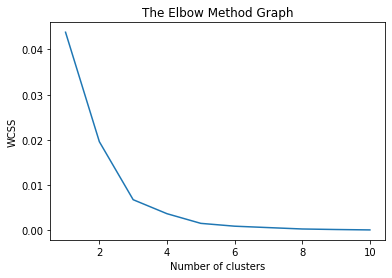

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
wcss=[]
#kl_mall.drop(["Neighbourhood"], 1)
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(blr_mall)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(blr_mall)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0])

In [36]:
# create a new dataframe 
blr_merged = blr_mall_copy.copy()
# add clustering labels
blr_merged["Cluster Labels"] = kmeans.labels_

In [37]:
blr_merged.rename(columns={"Neighbourhoods": "Neighbourhood"}, inplace=True)
blr_merged.head()

,Neighbourhood,Shopping Mall,Cluster Labels
0,Adugodi,0.010,0
1,Ananthnagar,0.000,0
2,Anjanapura,0.000,0
3,Arekere,0.025,2
4,Austin Town,0.010,0


In [38]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood

blr_merged = blr_merged.join(blr_df.set_index("Neighbourhood"), on="Neighbourhood")

print(blr_merged.shape)
blr_merged.head() # check the last columns!

(127, 5)


,Neighbourhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Adugodi,0.010,0,12.94402,77.60800
1,Ananthnagar,0.000,0,12.95408,77.54135
2,Anjanapura,0.000,0,12.85811,77.55909
3,Arekere,0.025,2,12.88568,77.59668
4,Austin Town,0.010,0,12.96348,77.61297


In [39]:
# sort the results by Cluster Labels
print(blr_merged.shape)
blr_merged.sort_values(["Cluster Labels"], inplace=True)
blr_merged

(127, 5)


,Neighbourhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Adugodi,0.010000,0,12.944020,77.608000
84,Nagarbhavi,0.000000,0,12.956240,77.509360
82,"Murphy Town, Bangalore",0.011628,0,12.980030,77.627760
81,Milk Colony,0.000000,0,13.023254,77.579079
80,Mathikere,0.000000,0,13.032350,77.558660
79,Mariyannapalya,0.000000,0,13.049640,77.611820
74,Madiwala,0.010000,0,12.920520,77.620900
71,Kumaraswamy Layout,0.000000,0,12.898190,77.559270
69,Koramangala,0.000000,0,12.920040,77.625460
68,Koppa gate,0.000000,0,12.800940,77.630190


**Finally, let's visualize the resulting clusters**

In [40]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blr_merged['Latitude'], blr_merged['Longitude'], blr_merged['Neighbourhood'], blr_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [41]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

### 8. Examine Clusters

#### Cluster 0

In [42]:
blr_merged.loc[blr_merged['Cluster Labels'] == 0]

,Neighbourhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Adugodi,0.010000,0,12.944020,77.608000
84,Nagarbhavi,0.000000,0,12.956240,77.509360
82,"Murphy Town, Bangalore",0.011628,0,12.980030,77.627760
81,Milk Colony,0.000000,0,13.023254,77.579079
80,Mathikere,0.000000,0,13.032350,77.558660
79,Mariyannapalya,0.000000,0,13.049640,77.611820
74,Madiwala,0.010000,0,12.920520,77.620900
71,Kumaraswamy Layout,0.000000,0,12.898190,77.559270
69,Koramangala,0.000000,0,12.920040,77.625460
68,Koppa gate,0.000000,0,12.800940,77.630190


#### Cluster 1

In [43]:
blr_merged.loc[blr_merged['Cluster Labels'] == 1]

,Neighbourhood,Shopping Mall,Cluster Labels,Latitude,Longitude
53,Jalahalli,0.125000,1,13.05450,77.52658
94,Ramachandrapura,0.062500,1,13.06124,77.55112
28,Dasarahalli,0.100000,1,13.04224,77.51507
105,"Siddapura, Bangalore",0.063492,1,12.95613,77.73196


#### Cluster 2

In [44]:
blr_merged.loc[blr_merged['Cluster Labels'] == 2]

,Neighbourhood,Shopping Mall,Cluster Labels,Latitude,Longitude
116,Varthur,0.034483,2,12.943480,77.747030
122,"Whitefield, Bangalore",0.031746,2,12.979380,77.733720
3,Arekere,0.025000,2,12.885680,77.596680
121,Vyalikaval,0.038462,2,13.037920,77.618630
120,Vimanapura,0.022727,2,13.002540,77.667640
124,Yelachenahalli,0.022222,2,12.900440,77.568650
114,Ulsoor,0.020000,2,12.989080,77.627950
110,Tannery Road,0.017857,2,13.007681,77.612868
104,"Shivajinagar, Bangalore",0.020000,2,12.987200,77.604010
50,Ittamadu,0.028571,2,12.923440,77.542840
